In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_tms.csv')


In [67]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [68]:
# Посмотрим распределение значений
print(df['Survived'].value_counts())

# Посмотрим доли
print(df['Survived'].value_counts(normalize=True))


Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


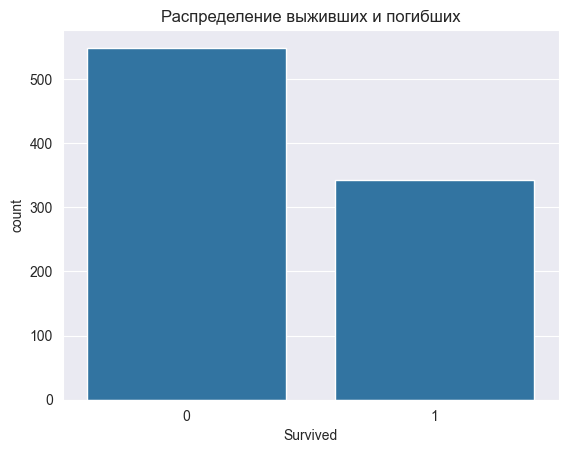

In [69]:
sns.countplot(x='Survived', data=df)
plt.title('Распределение выживших и погибших')
plt.show()


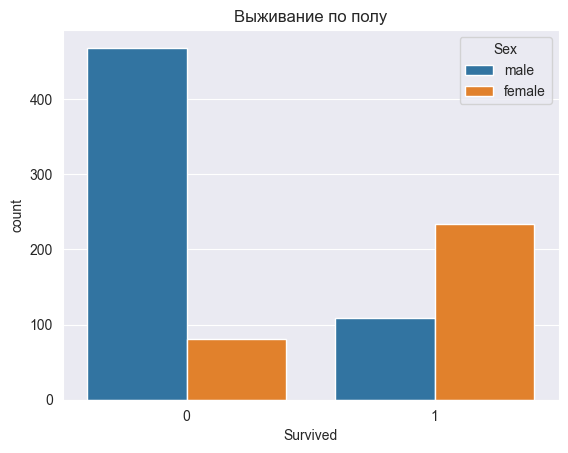

In [70]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Выживание по полу')
plt.show()


In [71]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

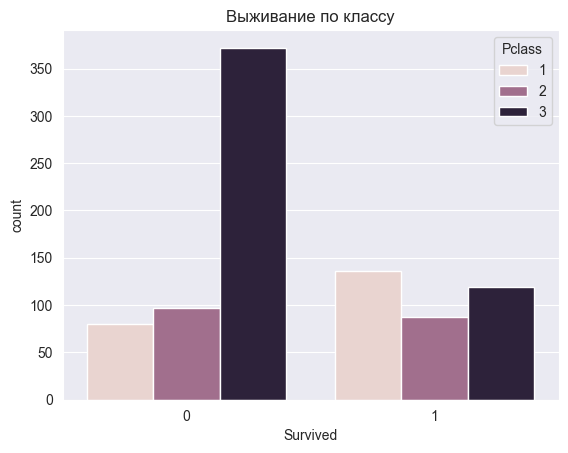

In [72]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Выживание по классу')
plt.show()


In [73]:
def get_title(name):
    if pd.isna(name):
        return None
    # Имя в формате "Moran, Mr. James"
    if "Mr." in name:
        return "Mr"
    elif "Mrs." in name:
        return "Mrs"
    elif "Miss." in name or "Ms." in name:
        return "Miss"
    elif "Master." in name:
        return "Master"
    else:
        return "Other"

# Создаём новый столбец с титулом
df['Title'] = df['Name'].apply(get_title)


In [74]:
# Считаем медианный возраст для каждого титула
title_age_median = df.groupby('Title')['Age'].median()

# Функция для заполнения возраста
df['Age'] = df.apply(lambda row: title_age_median[row['Title']] if pd.isna(row['Age']) else row['Age'], axis=1)

# Проверка
print(df[['Name', 'Title', 'Age']].head(10))


                                                Name   Title   Age
0                            Braund, Mr. Owen Harris      Mr  22.0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs  38.0
2                             Heikkinen, Miss. Laina    Miss  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs  35.0
4                           Allen, Mr. William Henry      Mr  35.0
5                                   Moran, Mr. James      Mr  30.0
6                            McCarthy, Mr. Timothy J      Mr  54.0
7                     Palsson, Master. Gosta Leonard  Master   2.0
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs  27.0
9                Nasser, Mrs. Nicholas (Adele Achem)     Mrs  14.0


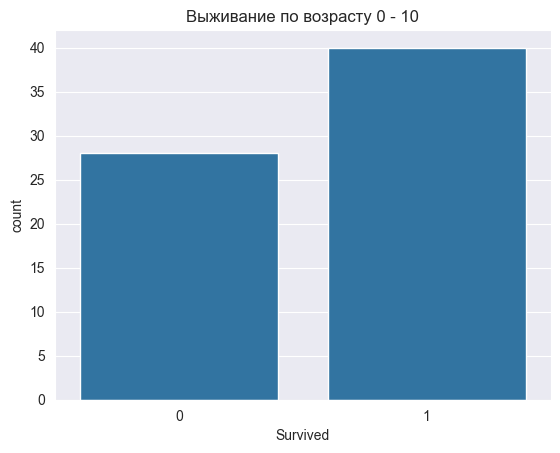

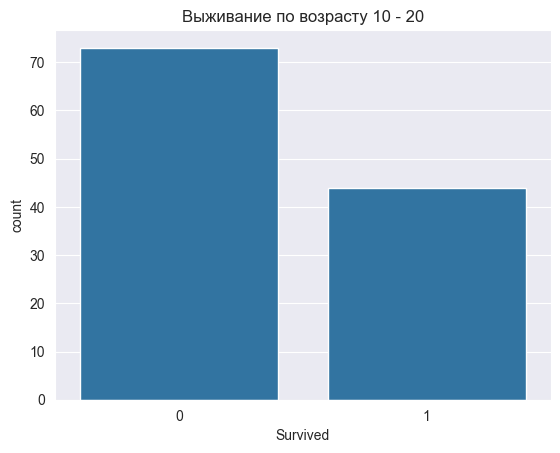

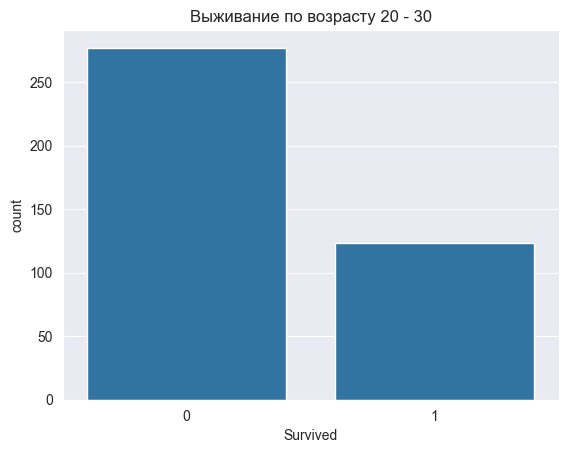

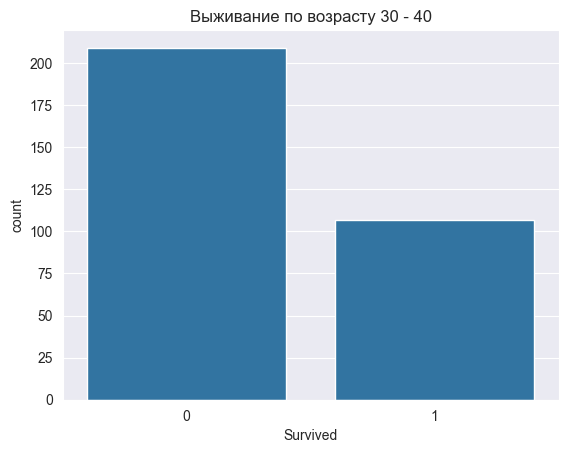

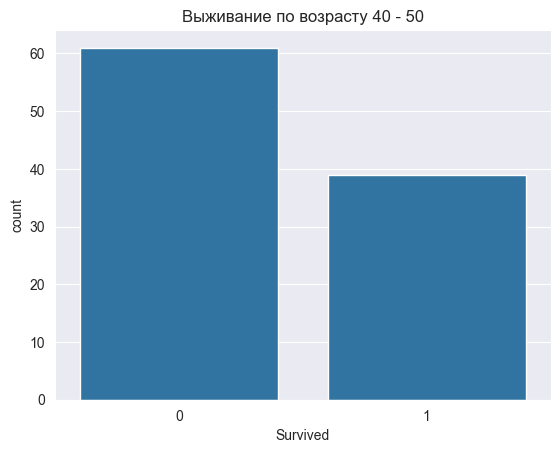

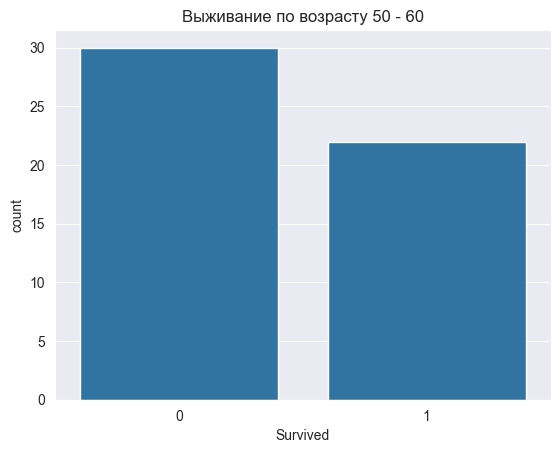

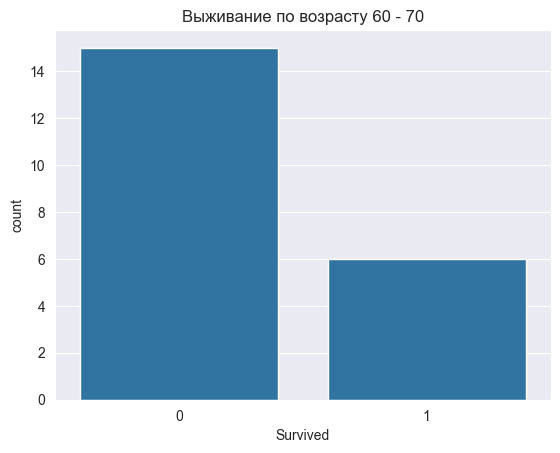

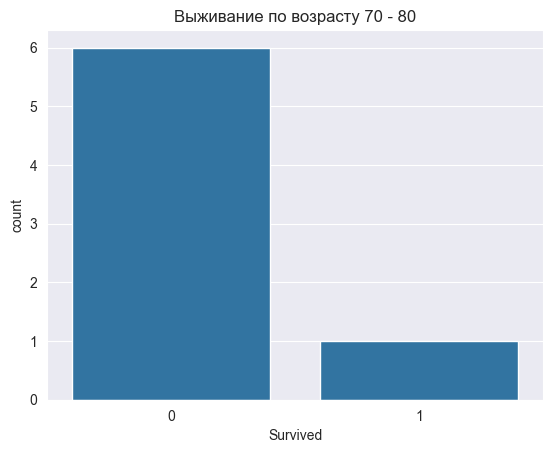

In [75]:
ages = (0, 10, 20, 30, 40, 50, 60, 70, 80)
for i in range(1, len(ages)):
    category_df = df[(df['Age'] >= ages[i - 1]) & (df['Age'] <= ages[i])]
    sns.countplot(x='Survived', data=category_df)
    plt.title(f'Выживание по возрасту {ages[i-1]} - {ages[i]}')
    plt.show()


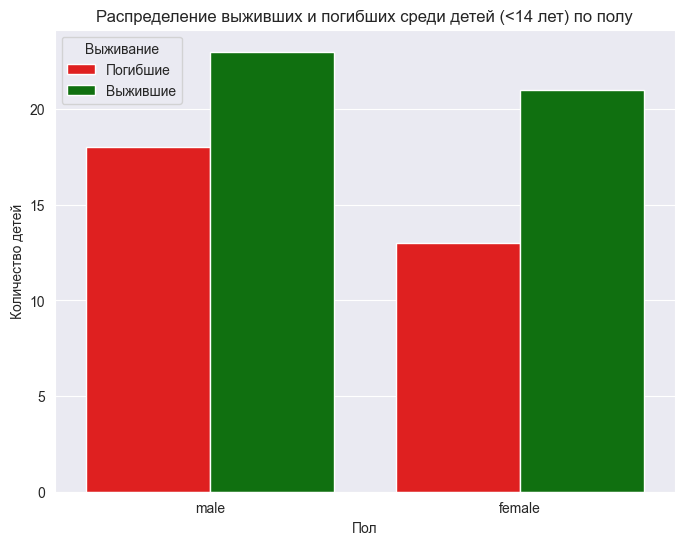

In [76]:
children = df[df['Age'] < 14]

# Строим график распределения по полу и выживанию
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', hue='Survived', data=children, palette={0:'red', 1:'green'})
plt.title('Распределение выживших и погибших среди детей (<14 лет) по полу')
plt.xlabel('Пол')
plt.ylabel('Количество детей')
plt.legend(title='Выживание', labels=['Погибшие', 'Выжившие'])
plt.show()

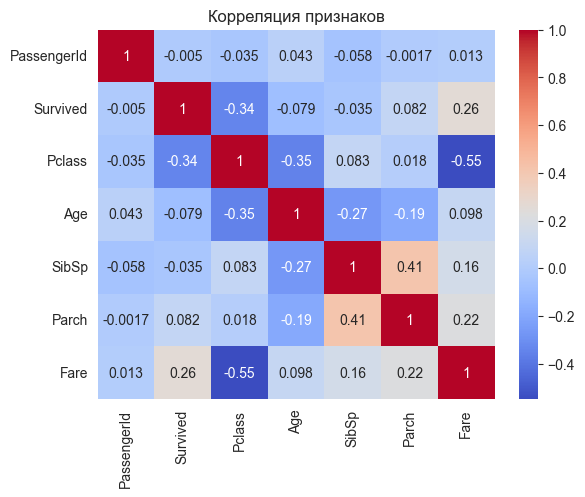

In [77]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()


In [78]:
features = ["Pclass", "Sex", "Age", "Embarked"]
X = df[features]
y = df["Survived"]

X = pd.get_dummies(X, columns=["Sex", "Embarked"], drop_first=True)
    

In [79]:
X.head()


,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,True,False,True
1,1,38.0,False,False,False
2,3,26.0,False,False,True
3,1,35.0,False,False,True
4,3,35.0,True,False,True


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [82]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [83]:
X_small = df[["Age"]] 
y = df["Survived"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y, test_size=0.2, random_state=42
)

In [84]:
model_small = LogisticRegression(max_iter=500)
model_small.fit(X_train_s, y_train_s)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [85]:
train_acc_small = accuracy_score(y_train_s, model_small.predict(X_train_s))
test_acc_small = accuracy_score(y_test_s, model_small.predict(X_test_s))

print("=== Недообучение (мало признаков) ===")
print(f"Train accuracy: {train_acc_small:.3f}")
print(f"Test accuracy : {test_acc_small:.3f}")

=== Недообучение (мало признаков) ===
Train accuracy: 0.624
Test accuracy : 0.587


In [86]:
# === Переобучение: используем почти все признаки ===
X_overfit =df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked",
                  "Name", "Ticket", "Cabin"]].copy()
y = df["Survived"]

In [87]:
categorical_cols = ["Sex", "Embarked", "Name", "Ticket", "Cabin"]
X_overfit = pd.get_dummies(X_overfit, columns=categorical_cols, drop_first=True)


In [88]:
X_train_of, X_test_of, y_train_of, y_test_of = train_test_split(
    X_overfit, y, test_size=0.2, random_state=42
)

In [89]:
model_overfit = LogisticRegression(max_iter=1000)
model_overfit.fit(X_train_of, y_train_of)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [90]:
train_acc_of = accuracy_score(y_train_of, model_overfit.predict(X_train_of))
test_acc_of  = accuracy_score(y_test_of, model_overfit.predict(X_test_of))

print("=== Переобучение (слишком много признаков) ===")
print(f"Train accuracy: {train_acc_of:.3f}")
print(f"Test accuracy : {test_acc_of:.3f}")

=== Переобучение (слишком много признаков) ===
Train accuracy: 0.926
Test accuracy : 0.816


In [91]:
import math

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def predict(x, w, b):
    z = sum(w[j]*x[j] for j in range(len(w))) + b
    return sigmoid(z)

In [92]:
def change_w(w, X, y, b, learning_rate):
    m = len(X)
    new_w = []
    for i in range(len(w)):
        d_w_i = (sum((predict(X[j], w, b) - y[j]) * X[j][i] for j in range(m)) * 2 / m)
        new_w.append(w[i] - learning_rate * d_w_i)
    return new_w

def change_b(w, X, y, b, learning_rate):
    m = len(X)
    d_b = (sum((predict(X[j], w, b) - y[j]) for j in range(m)) * 2 / m)
    return b - learning_rate * d_b

In [93]:
def train(X, y, learning_rate=0.1, epochs=5000):
    m = len(X)
    n_features = len(X[0])
    w = [0.0]*n_features
    b = 0.0
    
    for epoch in range(epochs):
        # Вычисляем среднеквадратичную ошибку (MSE)
        MSE = sum((predict(X[i], w, b) - y[i]) ** 2 for i in range(m)) / m

        # Печатаем каждые 100 эпох
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, MSE = {MSE:.4f}")

        # Обновляем веса и смещение
        w = change_w(w, X, y, b, learning_rate)
        b = change_b(w, X, y, b, learning_rate)

    return w, b

In [94]:
df_test = df[["Survived", "Pclass", "Sex", "Age"]].copy()
df_test["Sex"] = df_test["Sex"].map({"male": 0, "female": 1})

X = df_test[["Pclass", "Sex", "Age"]].values
X = (X - X.mean(axis=0)) / X.std(axis=0)   # стандартизация
y = df_test["Survived"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== 6. Запуск функции train() =====
w, b = train(X_train, y_train, learning_rate=0.1, epochs=1000)

Epoch 0, MSE = 0.2500
Epoch 100, MSE = 0.1473
Epoch 200, MSE = 0.1469
Epoch 300, MSE = 0.1468
Epoch 400, MSE = 0.1468
Epoch 500, MSE = 0.1468
Epoch 600, MSE = 0.1468
Epoch 700, MSE = 0.1468
Epoch 800, MSE = 0.1468
Epoch 900, MSE = 0.1468


In [95]:
def predict_class(x, w, b, threshold=0.5):
    return 1 if predict(x, w, b) >= threshold else 0

y_pred = [predict_class(x, w, b) for x in X_test]

accuracy = np.mean(np.array(y_pred) == y_test)
print("Test accuracy:", accuracy)

Test accuracy: 0.8100558659217877
